# DSI Project 2 - Ames Housing Data and Kaggle Challenge

Part 2: EDA 

[Data Dictionary](https://www.kaggle.com/c/dsir-712-project-2-regression-challenge/data)


### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading of cleaned CSVs

In [2]:
train_clean = pd.read_csv('./datasets/train_cleaned.csv')
train_clean.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,...,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,mo_sold,yr_sold,sale_type,saleprice
0,0,109,533352170,60,RL,68.0,13517,Pave,IR1,Lvl,...,TA,Y,0,44,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,...,TA,Y,0,74,0,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,...,TA,Y,0,52,0,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,...,TA,Y,100,0,0,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,...,TA,N,0,59,0,0,3,2010,WD,138500


In [3]:
#dropping the Unnamed column
train_clean.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
train_clean.shape

(2048, 73)

__Check for nulls__

In [6]:
train_clean.columns[train_clean.isnull().any()]

Index([], dtype='object')

In [7]:
sum(train_clean.isnull().sum()) 

0

Let's take a look at distribution of our deoendendt variable, what we aim to make predictions of. 

In [8]:
train_clean.saleprice.describe()

count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


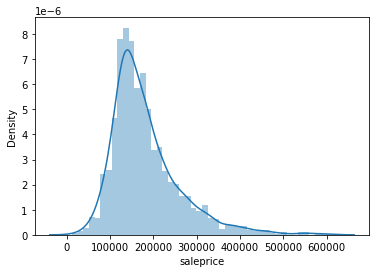

In [9]:
sns.distplot(train_clean.saleprice);

/Users/aishakamara/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


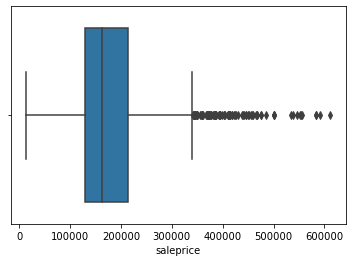

In [10]:
sns.boxplot(train_clean.saleprice);

* On average sale prices are aliitke over $181K, with homes ranging from as little as ~$13K to a little over $600K. Taht's a quite a vast range. 
* There are quite a number of outliers. 

### EDA- Correlation Heat Map 

<AxesSubplot:>

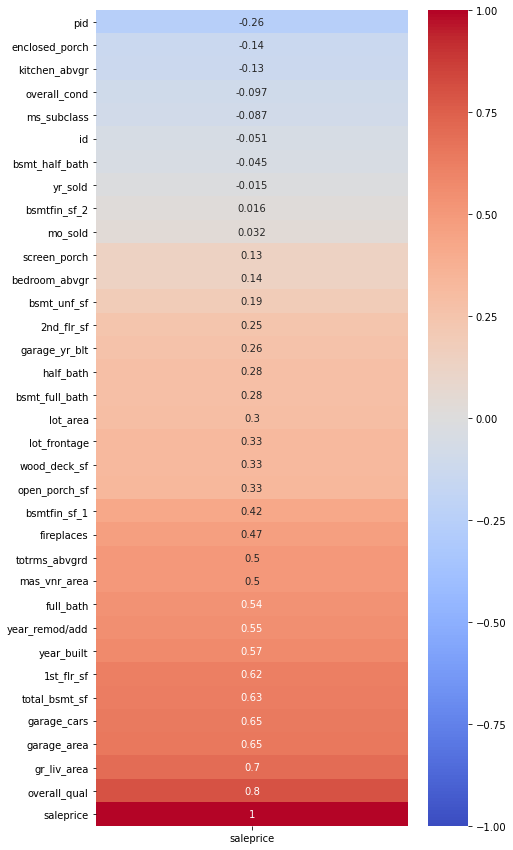

In [11]:
#Coorelation heat map
plt.figure(figsize=(7, 15))
sns.heatmap(train_clean.corr()[['saleprice']].sort_values('saleprice'),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)


For my initial analysis I've decided to look at variables that have strong (>0.5) negative or postive correlation (+/-) to the dependent variable, sale price. 

Let's take a a further look at these variables in coorleation  to slaes prices to.`

In [ ]:
sns.pairplot(train, x_vars=['tot', 'Enroll', 'F.Undergrad', 'Private', 'perc.alumni'], x_vars=['Apps'])

In [ ]:
plt.scatter(train_clean['full_bath'], train_clean['saleprice'], c ='cyan')
plt.title('Full Bath vs Sale Price')
plt.xlabel('Full Bath')
plt.ylabel('Sale Price')

The variable full bath on it's own does not look to have musch of a correlation with the average sale price. 

__Basement Attributes__

bsmt_qual        1996 non-null   object 
 31  bsmt_cond        1996 non-null   object 
 32  bsmt_exposure    1993 non-null   object 
 33  bsmtfin_type_1   1996 non-null   object 
 34  bsmtfin_sf_1     2050 non-null   float64
 35  bsmtfin_type_2   1995 non-null   object 
 36  bsmtfin_sf_2     2050 non-null   float64
 37  bsmt_unf_sf      2050 non-null   float64
 38  total_bsmt_sf    2050 non-null   float64
 * Out of all the numeric vales only totial basemnt-sf had a coorelation with teh sale price. 

In [ ]:
train_clean.total_bsmt_sf.value_counts()

In [ ]:
plt.scatter(train_clean['total_bsmt_sf'], train_clean['saleprice'], c ='orange')
plt.title('Total square feet of basement area vs Sale Price')
plt.xlabel('Total sq ft.')
plt.ylabel('Sale Price')

* Noted two observations with large basememt areas
* A mjority of teh obseractions seemed to clusstered aound the $0 to approximatkly $350,000 slae price. 

__Basement Conditions__

In [ ]:
x_cond = sorted(set(train_clean['bsmt_cond']))
y_cond = train_clean.groupby(train_clean['bsmt_cond'])['saleprice'].mean()
plt.bar(x_cond, y_cond)
plt.title('Average Home price Based on Basement Condition')
plt.xlabel('Basment Condition')
plt.ylabel('Average Home Price')

* Homes with a 'good' rating basement condition are shown to have higher sale prices.

[Graphing code source](https://github.com/scaress21/ames_housing/blob/master/code/02_EDA.ipynb)

Basment Quality Finish of Basment 

In [ ]:
x_qualx = sorted(set(train_clean['bsmtfin_type_1']))
y_qualy = train_clean.groupby(train_clean['bsmtfin_type_1'])['saleprice'].mean()
plt.bar(x_qualx, y_qualy)
plt.title('Average Sale price Based on Basement Quality Finish')
plt.xlabel('Basment Quality')
plt.ylabel('Average Sale Price')

* Once again we see that it pays to have not only a finished basement byt one of quality, well at least "good" enough quality, as these tend to result in slightly higher average sales prices. 
* Having no basment at all lends to a lower sales price compared to just having one at all. 

Quality of second finished area (if present)


- GLQ Good Living Quarters
- ALQ Average Living Quarters
- BLQ Below Average Living Quarters
- Rec Average Rec Room
- LwQ Low Quality
- Unf Unfinshed
- NA No Basement

In [ ]:
x_qual = sorted(set(train_clean['bsmtfin_type_2']))
y_qual = train_clean.groupby(train_clean['bsmtfin_type_2'])['saleprice'].mean()
plt.bar(x_qual, y_qual)
plt.title('Average Sale price Based on Quality of second finished area')
plt.xlabel('Living Quaters Quality')
plt.ylabel('Average Sale Price')

* *Homes with "good" living quarters on average have a higher sale prices*

2. Total rooms above grade (does not include bathrooms)

In [ ]:
plt.scatter(train_clean['totrms_abvgrd'], train_clean['saleprice'], c ='green')
plt.title('Total rooms above ground (Excluding bathrooms) vs Sale Price')
plt.xlabel('Total rooms above ground')
plt.ylabel('Sale Price')

* There's no clear cut correlation.Haveing more rooms does not mean a higher saleprice per say. A home with a total of ten rooms can be sold aorund the same price as that of hoome with a total of three rooms. 

3. Overall Quality

It would be remiss of me not to at take a depper look t at teh indenpenedt varible with teh stongest leinear correlation to teh sale price. , 'overall quality'.

OverallQual: Overall material and finish quality
10 Very Excellent
9 Excellent
8 Very Good
7 Good
6 Above Average
5 Average
4 Below Average
3 Fair
2 Poor
1 Very Poor

In [ ]:
train_clean.overall_qual.dtype

In [ ]:
train_clean.overall_qual.value_counts()

* A very obvious outlier. Highly probable dure to huma erro as its recorded in a year further than 2014 (year of data collection)
* There begins to be an increase in sales prices as we see grages built from 2000 and beyond, but not enough to make a clear distinction. 

In [ ]:
x_overall = sorted(set(train_clean['overall_qual']))
y_overall = train_clean.groupby(train_clean['overall_qual'])['saleprice'].mean()
plt.bar(x_overall, y_overall)
plt.title('Average Sale price Based on Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price')

In [ ]:
train_clean.groupby ('overall_qual').mean()[['saleprice']]

Based on the visuals repssntaion above, its clear that homes with overall quality finishe sell much higher than those built with poor finishes. Even with a difference of 1 level rating e.g. 'Excellent (9)' versus "Very Excellemnt(10)', the difference in average home price approximatley $47K.

Based on the EDA performed in this notebook, it's clear that some of the variables associcted with teh home categories I focused on do not have much of strong relationship with average sales price, particularly the number of bedrooms or total rooms in general. I'd still like to test out my initital model incoroprating these numerical variables along side the 'overall quality variable' at least as a basleine. I'll add and meove variables aftwareards in order to see what combination produces teh strongest represenation of model. Let's shift to my 'modelling' notebook to delve into this. 